In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Adaptive Gradient Descent Algorithm

Why do we need adaptive gradient descent?<br>
1. We want an adaptive learning rate at times. If the slope of the loss curve is very steep at some time,<br>
    we wish for a small learning rate whereas if erros surface at somt point flat, we want the learning rate to be higher
2. If a sparse feature turns out to be very imporatnt we want a higher lr for it
    - During gradient descent the probability of the feature to get updated is low as the batch selected may have all <br>
        0 values corresponding to the feature.
    - Even if there is an update the update could be very small as most of the example of the batch has very few non-zero values<br>
Hence we sould like to compensate this small gradient value with large learning rate.

**AdaGrad** <https://youtu.be/WSvxne3oGr0?list=PLZ2ps__7DhBZVxMrSkTIcG6zZBDKUXCnM&t=292> <br>
Based on the given premise we want to device an algorithm which can compensate a sparse feature with larger learning rate<br>
The update rule for ada grad is given by
$$
    v_t = v_{t-1} + (\nabla w_t)^2\\
    w_{t+1} = v_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
$$
$v_t$ tracks the history of updates. The neurons which gets updated rarely or get updated by small quantity are compensated in the second eq.<br>

DISADVANTAGES<br>
1. The optimization process is a bit slow as this method do not use concept of momentum.
2. After certain iteration when ther term $v_t$ accumulates some history, the learning process slows down as the value of $v_t$ starts to increase.<br>This is particularly true for dense feature. 


**RMSProp** <https://www.youtube.com/watch?v=ubOy0NPI2cY&list=PLZ2ps__7DhBZVxMrSkTIcG6zZBDKUXCnM&index=39> <br>
1. To reduce the monotonic decay of learning rate of adagrad, rmsprop introduced a scaling term. The equation is given by
$$
    \begin{align*}
        v_t &= \beta v_{t-1} + (1-\beta)(\nabla w_t)^2\\
        w_{t+1} &= v_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
1. Upon expanding the $v_t$ term we can see that more weightage is given to recent gradient values.
2. Unlike the adagrad the accumulation of weights ($v_t$) can decrease after some iteration. This leads to stability of learning rate.
3. With the stability of learning rate it brings the problem of oscillation around the local minima. This can be fixed with proper<br>
    initialization of initial learning rate.
4. Proper initialization of learning rate is not trivial. This is a trial and error process which is often not feasible.

**AdaGrad**<br>
1. Adaptive Gradient algorithm
2. Decay the learning rate inversely proportional to the update history. The more the upadate the less the leraning rate.
$$
    \begin{align*}
        v_t &= v_{t-1} + (\nabla w_t)^2\\
        w_{t+1} &= w_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
3. There is no momentum term in AdaGrad. The convergence is slower compared to momtnum based algorithms.
4. As it comes toward convergence, the convergence speed decreases.

**RMS Prop**<br>
1. AdaGrad decreases the learning rate very aggressively as a result the frequent parameters will get very small updates due to decaying learning rate.
2. RMSProp tries to solve the problem with decaying the denominator term.
$$
    \begin{align*}
        v_t &= \beta v_{t-1} + (1-\beta)(\nabla w_t)^2\\
        w_{t+1} &= w_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
Expanding the v terms we have

$$
    v_3 = 0.08*v_0 + 0.09*v_1 + 0.1*v_2
$$
3. High oscillation once it reaches neighbourhood of minima. 
4.

# visualizing gradient descent
1. Try to learn sigmoid function using a single neuron.
2. Stochastic Gradient Descent to optimize the learning function.

In [3]:
class VisualizeGradientDescent:
    def __init__(self):
        self.w = None   # weights
        self.b = None   # bias
        self.losses = []
        self.ws = []
        self.bs = []

def function(z):
    out = np.exp(z)/(1+np.exp(z))
    return out
    
def grad_w(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = -x*(y-fz)*(1-fz)*fz
    return out
    
def grad_b(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = -(y-fz)*fz* (1-fz)
    return out
    
def cal_loss(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = (y-fz)**2
    return out

In [68]:
# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 1)
sparse_indices = indices = np.random.choice(X.size, int(0.5*X.size), replace=False)
X[sparse_indices] = 0
y = function(X)

In [69]:
w_range = [-5, 5]
b_range = [-5, 5]
w = np.linspace(w_range[0], w_range[1], 100)
b = np.linspace(w_range[0], w_range[1], 100)
W, B = np.meshgrid(w, b)

losses = np.zeros_like(W)
for i in range(len(W)):
    for j in range(len(W[i])):
        y_hat = function(W[i, j]*X + B[i, j])
        loss = np.mean((y-y_hat)**2)
        losses[i, j] = loss

In [70]:
B.shape

(100, 100)

In [71]:
def calculate_gradient(model, X, Y):
    dw, db, loss = 0, 0, 0
    n = len(X)

    for x, y in zip(X, Y):
        dw += grad_w(model.w, model.b, x, y)
        db += grad_b(model.w, model.b, x, y)
        loss += cal_loss(model.w, model.b, x, y)
    return loss/n, dw, db

In [72]:
# Implementation of momentum based gradient descent
def momentum_gradient_descent(model, w0, b0, x, y, lr=0.1, beta=0.9, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    beta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    
    
    v = 0
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)
        w_v = beta * v + (1-beta) * dw
        w_b = beta * v + (1-beta) * db
        model.w = model.w - lr * w_v
        model.b = model.b - lr * w_b

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [73]:
def ada_grad(model, w0, b0, x, y, lr=0.1, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    eta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    
    w_v = 0
    w_b = 0
    eps = 1e-6
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)

        w_v = w_v + dw**2
        w_b = w_b + db**2
        model.w = model.w - (lr/np.sqrt(w_v+eps)) * dw
        model.b = model.b - (lr/np.sqrt(w_b+eps)) * db

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [74]:
def rms_prop(model, w0, b0, x, y, lr=0.1, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    eta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    model.dws = []
    model.w_vs = []
    model.w_lrs = []
    
    w_v = 0
    w_b = 0
    eps = 1e-6
    beta = 0.9
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)

        w_v = beta * w_v + (1 - beta) * dw**2
        w_b = beta * w_b + (1 - beta) * db**2

        w_lr = (lr/np.sqrt(w_v+eps))
        b_lr = (lr/np.sqrt(w_b+eps))
        
        model.w = model.w - w_lr * dw
        model.b = model.b - b_lr * db

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)
        model.dws.append(dw)
        model.w_vs.append(w_v)
        model.w_lrs.append((lr/np.sqrt(w_v+eps)))

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [75]:
def ada_delta(model, w0, b0, x, y, n_epoch=100):
    """
    Implements AdaDelta optimization algorithm.

    Parameters:
    model: The model to optimize (with attributes model.w and model.b for weights and biases).
    w0: Initial weights.
    b0: Initial bias.
    x: Input data.
    y: Target data.
    n_epoch: Number of epochs for training (default: 100).
    """

    # Initialize model parameters
    model.w = w0        # Initialize weights
    model.b = b0        # Initialize bias
    model.losses = []   # Track the loss during training
    model.ws = []       # Track the weight updates
    model.bs = []       # Track the bias updates

    # Initialize AdaDelta accumulators
    w_v = 0  # Accumulator for gradient square (for weights)
    b_v = 0  # Accumulator for gradient square (for bias)
    w_u = 0  # Accumulator for delta updates (for weights)
    b_u = 0  # Accumulator for delta updates (for bias)

    eps = 1e-6  # Small constant to prevent division by zero
    beta = 0.9  # Decay factor for the running averages
    prev_loss = np.inf  # Initialize the previous loss to infinity for convergence check

    for _ in range(n_epoch):
        # Calculate loss and gradients with respect to w and b
        loss, dw, db = calculate_gradient(model, x, y)

        # Update the running averages of the squared gradients (w_v and b_v)
        w_v = beta * w_v + (1 - beta) * dw**2
        b_v = beta * b_v + (1 - beta) * db**2

        # Compute the parameter updates (del_w and del_b) using AdaDelta formula
        del_w = -(np.sqrt(w_u + eps) / np.sqrt(w_v + eps)) * dw
        del_b = -(np.sqrt(b_u + eps) / np.sqrt(b_v + eps)) * db

        # Apply the updates to the weights and biases
        model.w = model.w + del_w
        model.b = model.b + del_b

        # Update the running averages of the squared updates (w_u and b_u)
        w_u = beta * w_u + (1 - beta) * (del_w)**2
        b_u = beta * b_u + (1 - beta) * (del_b)**2

        # Track the loss, weights, and biases
        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        # Early stopping based on convergence of loss
        if np.abs(prev_loss - loss) < 1e-10:
            break

        # Update the previous loss for the next iteration
        prev_loss = loss

In [76]:
def sgd(model, w0, b0, x, y, epochs=100, lr=1):
    # Initialize model parameters
    model.w = w0
    model.b = b0
    model.losses = []
    model.ws = []
    model.bs = []

    prev_loss = np.inf
    for _ in range(epochs):
        loss, dw, db = calculate_gradient(model, x, y)
        model.w = model.w - lr * dw
        model.b = model.b - lr * db

        model.ws.append(model.w)
        model.bs.append(model.b)
        model.losses.append(loss)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [77]:
def adam(model, w0, b0, x, y, n_epoch=100, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
    """
    Implements the Adam optimization algorithm.

    Parameters:
    model: The model to optimize (with attributes model.w and model.b for weights and biases).
    w0: Initial weights.
    b0: Initial bias.
    x: Input data.
    y: Target data.
    n_epoch: Number of epochs for training (default: 100).
    lr: Learning rate (default: 0.001).
    beta1: Exponential decay rate for the first moment estimate (default: 0.9).
    beta2: Exponential decay rate for the second moment estimate (default: 0.999).
    eps: Small constant to prevent division by zero (default: 1e-8).
    """

    # Initialize model parameters
    model.w = w0        # Initialize weights
    model.b = b0        # Initialize bias
    model.losses = []   # Track the loss during training
    model.ws = []       # Track the weight updates
    model.bs = []       # Track the bias updates

    # Initialize Adam accumulators
    w_m = 0  # First moment (mean of gradients) for weights
    b_m = 0  # First moment (mean of gradients) for biases
    w_v = 0  # Second moment (uncentered variance) for weights
    b_v = 0  # Second moment (uncentered variance) for biases

    prev_loss = np.inf  # Initialize previous loss to infinity for convergence check

    for t in range(1, n_epoch + 1):
        # Calculate loss and gradients with respect to w and b
        loss, dw, db = calculate_gradient(model, x, y)

        # Update the first moment estimate (w_m and b_m)
        w_m = beta1 * w_m + (1 - beta1) * dw
        b_m = beta1 * b_m + (1 - beta1) * db

        # Update the second moment estimate (w_v and b_v)
        w_v = beta2 * w_v + (1 - beta2) * (dw ** 2)
        b_v = beta2 * b_v + (1 - beta2) * (db ** 2)

        # Correct bias for first moment estimate
        w_m_hat = w_m / (1 - beta1 ** t)
        b_m_hat = b_m / (1 - beta1 ** t)

        # Correct bias for second moment estimate
        w_v_hat = w_v / (1 - beta2 ** t)
        b_v_hat = b_v / (1 - beta2 ** t)

        # Compute the parameter updates using Adam's rule
        del_w = -(lr * w_m_hat) / (np.sqrt(w_v_hat) + eps)
        del_b = -(lr * b_m_hat) / (np.sqrt(b_v_hat) + eps)

        # Apply the updates to the weights and biases
        model.w = model.w + del_w
        model.b = model.b + del_b

        # Track the loss, weights, and biases
        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        # Early stopping based on convergence of loss
        if np.abs(prev_loss - loss) < 1e-10:
            break

        # Update the previous loss for the next iteration
        prev_loss = loss

In [78]:
def visualize_optimization(model):
    cm = plt.colormaps.get_cmap('viridis')
    plt.scatter(W, B, c=losses, cmap=cm)
    cp = plt.contour(W, B, losses, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(W, B, losses)
    for w, b in zip(model.ws, model.bs):
        plt.scatter(w, b, c='w', marker='*')
    plt.xlabel('W')
    plt.ylabel('B')
    plt.show()

In [79]:
model_sgd = VisualizeGradientDescent()
model_momentum = VisualizeGradientDescent()
model_adagrad =  VisualizeGradientDescent()
model_rms = VisualizeGradientDescent()
model_adadelta = VisualizeGradientDescent()
model_adam = VisualizeGradientDescent()

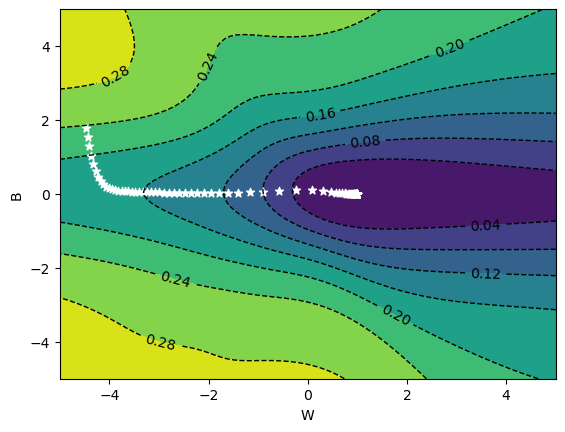

In [84]:
sgd(model_sgd, -4.5, 2, X, y, lr=0.1)
visualize_optimization(model_sgd)

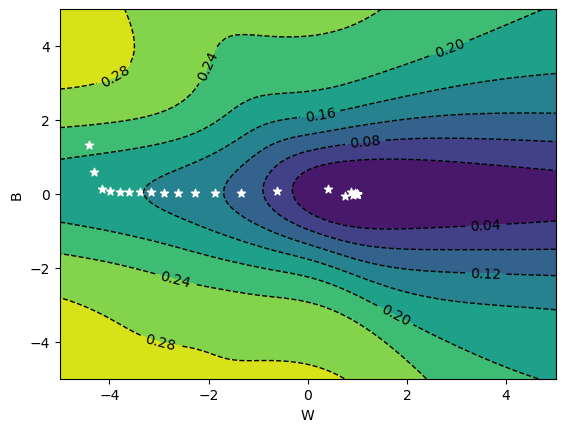

In [85]:
momentum_gradient_descent(model_momentum, -4.5, 2, X, y, lr=3)
visualize_optimization(model_momentum)

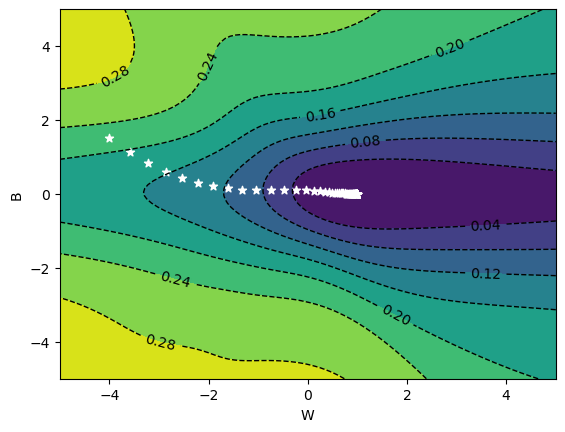

In [86]:
ada_grad(model_adagrad, -4.5, 2, X, y, lr=0.5)
visualize_optimization(model_adagrad)

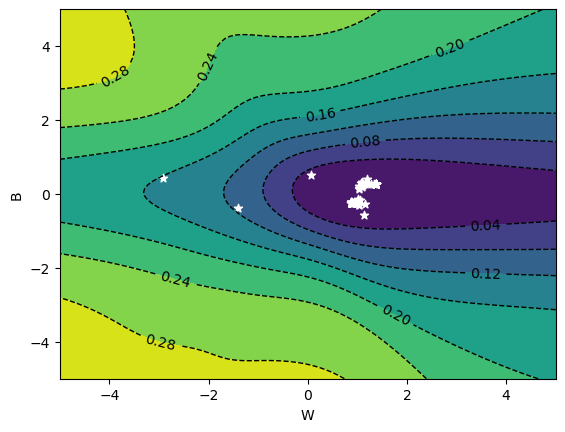

In [87]:
rms_prop(model_rms, -4.5, 2, X, y, lr=0.5)
visualize_optimization(model_rms)

In [ ]:
ada_delta(model_adadelta, -4.5, 2, X, y, n_epoch=1000)

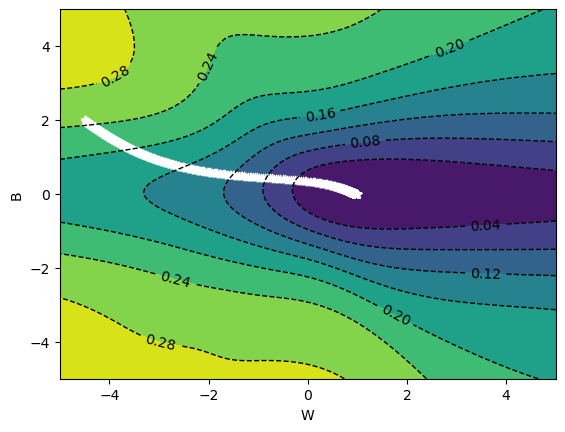

In [ ]:
visualize_optimization(model_adadelta)

In [88]:
print('Steps required by vanilla GD: ', len(model_sgd.losses))
print('Steps required by momentum based GD: ', len(model_momentum.losses))
print('Steps required by adagrad GD: ', len(model_adagrad.losses))  # Slower compared to momentum based optimizers as there is no momentum term.
print('Steps required by rms prop GD: ', len(model_rms.losses))     # Has a tendency to oscillate once it reaches neighbourhood of minima.

Steps required by vanilla GD:  100
Steps required by momentum based GD:  37
Steps required by adagrad GD:  100
Steps required by rms prop GD:  100


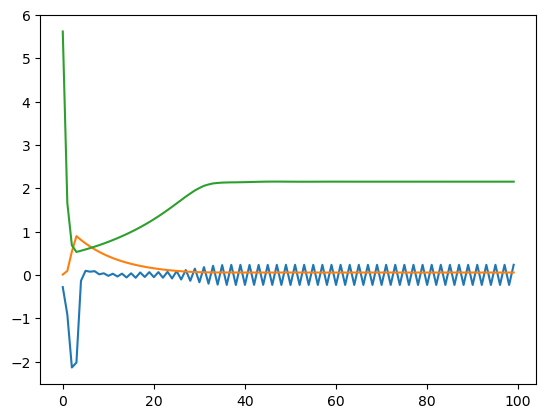

In [89]:
# Oscillation in RMSProp
# The phenomenoa of constant learning rate
plt.plot(model_rms.dws)
plt.plot(model_rms.w_vs)
plt.plot(model_rms.w_lrs)